# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_csv('exch_rates.csv')

In [3]:
df.Frequency = pd.to_datetime(df.Frequency)

In [4]:
df.set_index('Frequency', inplace=True)

In [5]:
#df.dropna(inplace=True)

In [6]:
df.describe()

,Euro,Australian Dollar,Danish Krone
count,4838.000000,4838.000000,4838.000000
mean,0.841266,1.325828,6.265792
std,0.129450,0.275717,0.962512
min,0.625391,0.904683,4.665228
25%,0.748531,1.106486,5.577640
50%,0.809192,1.303794,6.026726
75%,0.899260,1.414160,6.700631
max,1.211827,2.070793,9.019753


Plot the three exchange rates in one plot

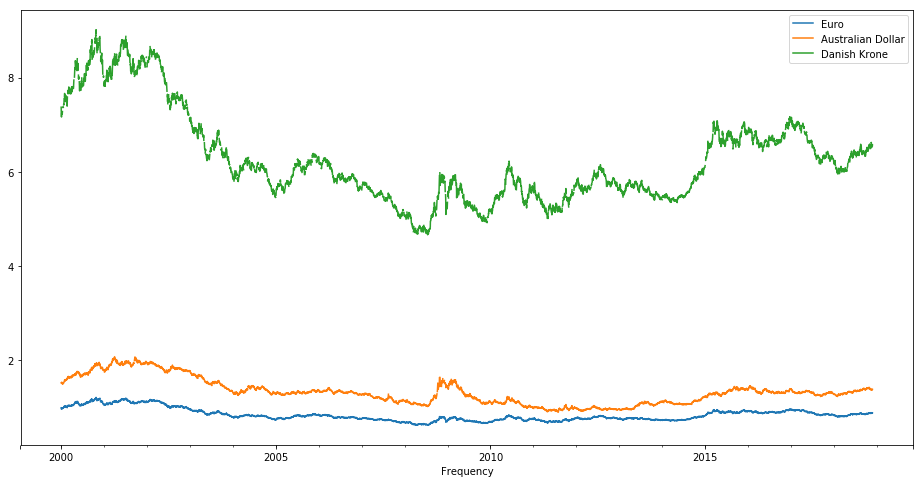

In [7]:
df.plot(figsize=(16,8))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [8]:
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfc43aa320>,
      dtype=object)

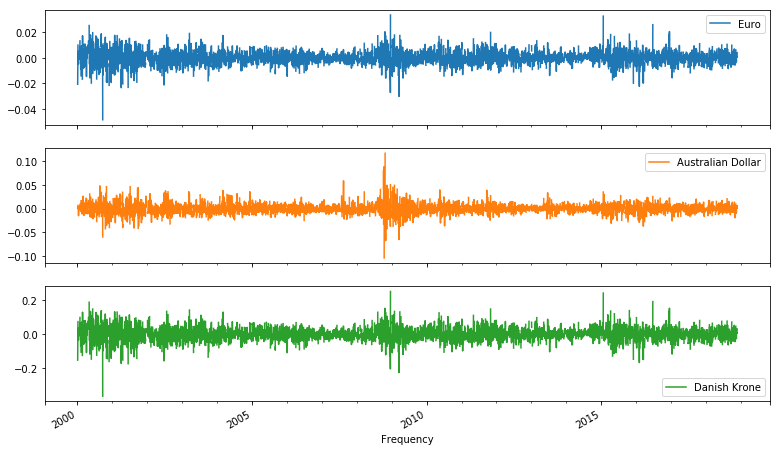

In [9]:
df_diff = df.diff(periods=1)
df_diff.plot(figsize = (13,8), subplots=True, legend=True)

### Explain what's going on

These data sets are far more identical when viewed separately. 

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [10]:
euro = df[['Euro']]

In [11]:
euro_shift_1 = euro.shift(periods=1)
lag_1 = pd.concat([euro_shift_1, euro], axis=1)

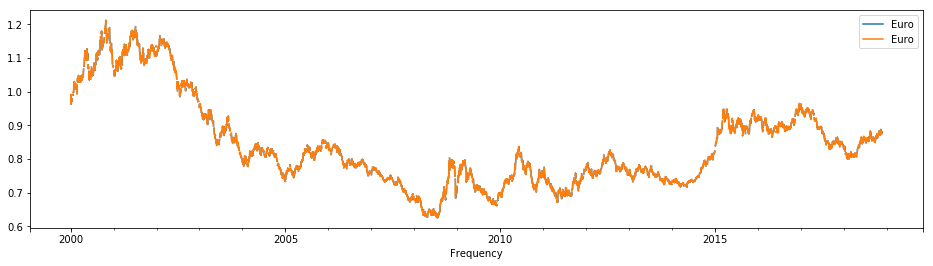

In [12]:
lag_1.plot(figsize=(16,4))

Repeat this, but for a "lag 5 autocorrelation"

In [13]:
euro_shift_50 = euro.shift(periods=50)
lag_50 = pd.concat([euro_shift_50, euro], axis=1)

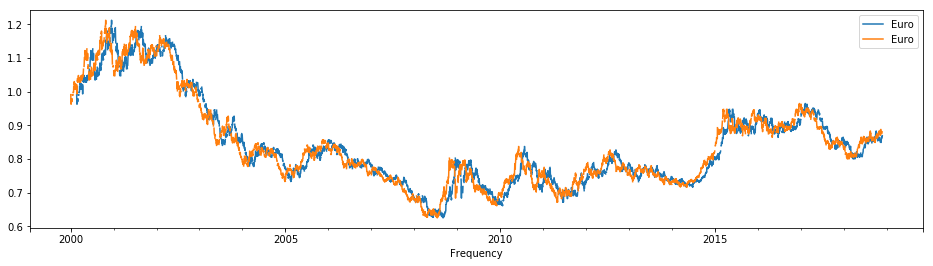

In [14]:
lag_50.plot(figsize=(16,4))

In [15]:
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

Knowing this, let's plot the ACF now.

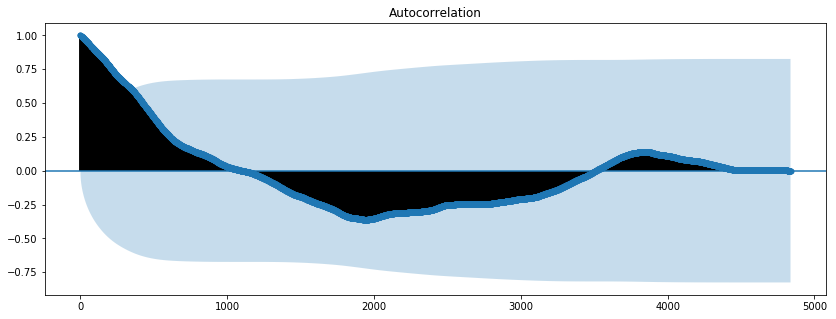

In [16]:
rcParams['figure.figsize'] = 14, 5

plot_acf(euro.dropna());

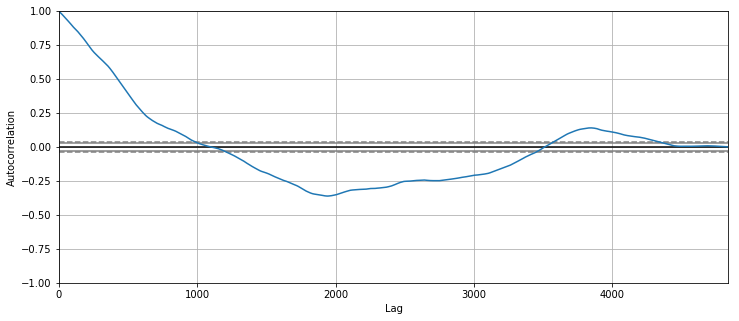

In [17]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

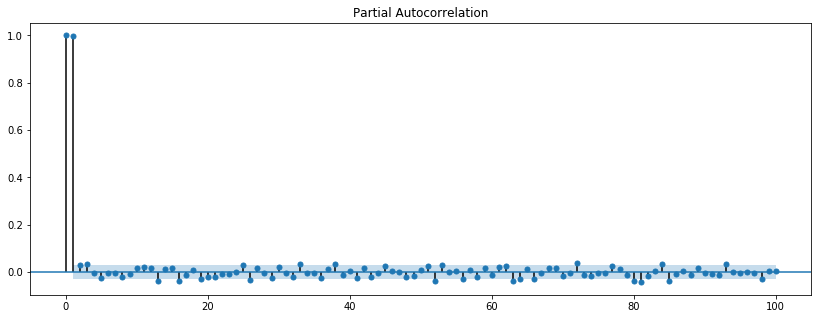

In [18]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(euro.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [25]:
df = pd.read_csv('passengers.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)

In [27]:
df_diff = df.diff(periods=1)

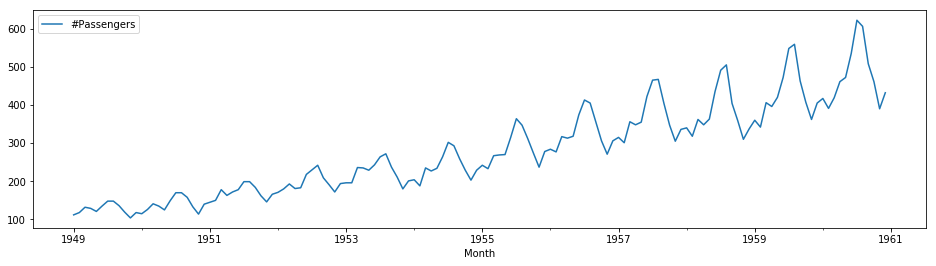

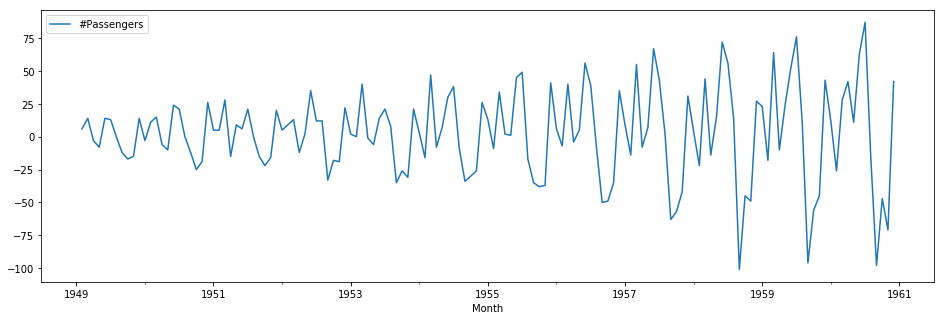

In [31]:
df.plot(figsize=(16,4))
plt.show()
df_diff.plot(figsize=(16,5))

In [ ]:
df.corr

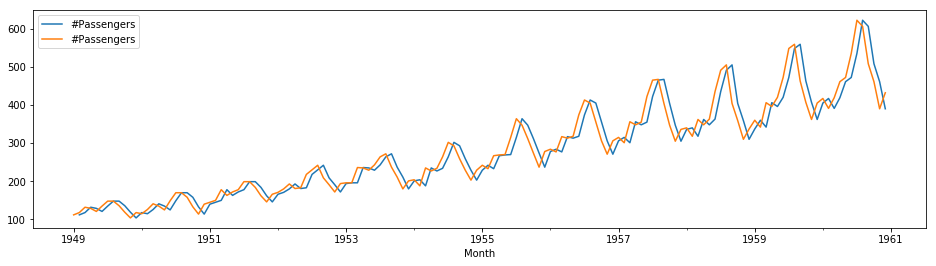

In [30]:
pass_shift_1 = df.shift(periods=1)
lag_1 = pd.concat([pass_shift_1, df], axis=1)
lag_1.plot(figsize=(16,4))

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


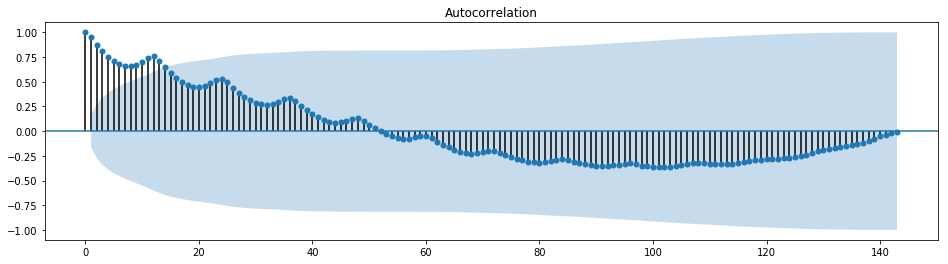

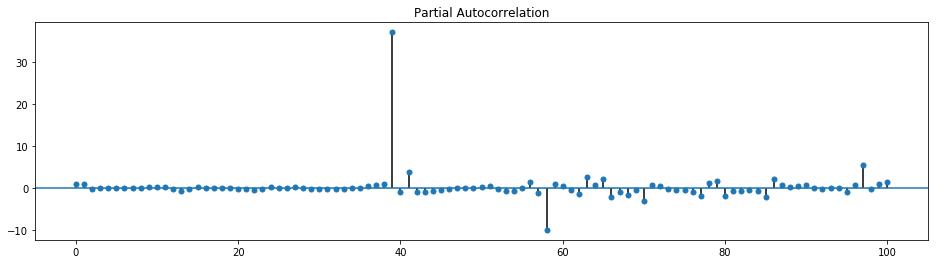

In [32]:
rcParams['figure.figsize'] = 16, 4
plot_acf(df.dropna());
rcParams['figure.figsize'] = 16, 4
plot_pacf(df.dropna(), lags = 100);

In [ ]:
# your code here

In [ ]:
# your code here

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!